<h1>Implementación y análisis de algoritmos de multiplicación de matrices cuadradas.</h1>

In [1]:
import math
from math import ceil, log
import numpy as np
import pylab as pl
%matplotlib inline

def iniciar_matriz_vacia(row,col):
    M=[]
    for i in range (0,row):
        M.append([0]*col)
    return M

def iniciar_matriz_aleatoria(row,col, rango):
    return np.random.randint(0, rango, (row,col))

<h2>Algoritmo con complejidad $O(n$<sup>$3$</sup>$)$</h2>

In [2]:
def mult_matriz(A, B): 
    try:
        row=len(A)
        col=len(B[0])
        assert row==col==len(A[0])==len(B)
        result=iniciar_matriz_vacia(row, col)
        for i in range (row):
            for j in range (col):
                for k in range (col):
                    result[i][j]+= A[i][k]*B[k][j]               
        return result
    except  AssertionError:
        print "Error, cada matriz debe ser cuadrada y del mismo tamaño"

In [3]:
A= iniciar_matriz_aleatoria(3,3,6)
B= iniciar_matriz_aleatoria(3,3,6)
print A
print B
print mult_matriz(A,B)

[[4 3 4]
 [4 5 2]
 [5 4 1]]
[[3 3 4]
 [3 0 4]
 [2 1 5]]
[[29, 16, 48], [31, 14, 46], [29, 16, 41]]


<h4> Análisis del tiempo de ejecución</h4>

In [4]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_mult_matriz(A, B, acct): 
    row=len(A); acct.count()
    col=len(B[0]); acct.count()
    result=iniciar_matriz_vacia(row, col); acct.count()
    acct.count()
    for i in range (row):
        acct.count()
        for j in range (col):
            acct.count()
            for k in range (col):
                acct.count()
                result[i][j]+= A[i][k]*B[k][j]; acct.count()               
    acct.count()
    return result

In [5]:
A= iniciar_matriz_aleatoria(3,3,6)
B= iniciar_matriz_aleatoria(3,3,6)
acct = Counter()
acct_mult_matriz(A, B, acct)
acct.print_steps()

Number of steps = 71


<h4>Análisis experimental</h4><br>
A continuación se analizará el comportamiento del algoritmo cuando el tamaño de las matrices de entrada varía, desde 2 hasta 100, se graficarán los resultados de total de instrucciones Vs tamaño de la matriz.

In [6]:
import time

def exper_analysis_mult(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        A= iniciar_matriz_aleatoria(i+2,i+2,6)
        B= iniciar_matriz_aleatoria(i+2,i+2,6)
        acct.reset()
        acct_mult_matriz(A, B, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [7]:
print (exper_analysis_mult(100))

[[27, 71, 153, 285, 479, 747, 1101, 1553, 2115, 2799, 3617, 4581, 5703, 6995, 8469, 10137, 12011, 14103, 16425, 18989, 21807, 24891, 28253, 31905, 35859, 40127, 44721, 49653, 54935, 60579, 66597, 73001, 79803, 87015, 94649, 102717, 111231, 120203, 129645, 139569, 149987, 160911, 172353, 184325, 196839, 209907, 223541, 237753, 252555, 267959, 283977, 300621, 317903, 335835, 354429, 373697, 393651, 414303, 435665, 457749, 480567, 504131, 528453, 553545, 579419, 606087, 633561, 661853, 690975, 720939, 751757, 783441, 816003, 849455, 883809, 919077, 955271, 992403, 1030485, 1069529, 1109547, 1150551, 1192553, 1235565, 1279599, 1324667, 1370781, 1417953, 1466195, 1515519, 1565937, 1617461, 1670103, 1723875, 1778789, 1834857, 1892091, 1950503, 2010105, 2070909], [0.00015727532721418605, 0.00018202883360874127, 0.00035681273851663714, 0.001087644921214419, 0.0011531511515512297, 0.0016050535792664629, 0.002496481681499652, 0.0034579440945076804, 0.005074166938854614, 0.005958651984416157, 0.0

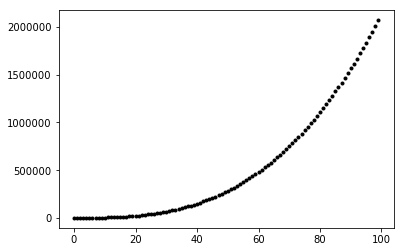

In [8]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis_mult(100)[0])
pl.plot(x, y, 'k.')

<h2>Algoritmo <i>Divide and Conquer</i> con complejidad $O(n$<sup>3</sup>$)$</h2>

In [9]:
def suma(A,B):
    result=iniciar_matriz_vacia(len(A), len(A))
    for i in range(len(A)):
        for j in range(len(A)):
            result[i][j] = A[i][j]+ B[i][j]
    return result


def div(A, B): 
    try:
        row=len(A)
        col=len(B[0])
        assert row==col==len(A[0])==len(B)
        if(row==2):            
            result=iniciar_matriz_vacia(row, col)
            result[0][0]=(A[0][0]*B[0][0])+(A[0][1]*B[1][0])
            result[0][1]=(A[0][0]*B[0][1])+(A[0][1]*B[1][1])
            result[1][0]=(A[1][0]*B[0][0])+(A[1][1]*B[1][0])
            result[1][1]=(A[1][0]*B[0][1])+(A[1][1]*B[1][1])
            return result
        else:
            odd=False
            if (row%2!=0):
                A= np.concatenate((A,iniciar_matriz_vacia(1,len(A))),axis=0)
                A= np.concatenate((A,iniciar_matriz_vacia(len(A),1)),axis=1)
                B= np.concatenate((B,iniciar_matriz_vacia(1,len(B))),axis=0)
                B= np.concatenate((B,iniciar_matriz_vacia(len(B),1)),axis=1)
                odd=True                
            C=iniciar_matriz_vacia(2, 2)
            C[0][0]=suma(div(A[:len(A)/2,:len(A)/2],B[:len(B)/2,:len(B)/2]), div(A[:len(A)/2,len(A)/2:],B[len(B)/2:,:len(B)/2]))
            C[0][1]=suma(div(A[:len(A)/2,:len(A)/2],B[:len(B)/2,len(B)/2:]), div(A[:len(A)/2,len(A)/2:],B[len(B)/2:,len(B)/2:]))
            C[1][0]=suma(div(A[len(A)/2:,:len(A)/2],B[:len(B)/2,:len(B)/2]), div(A[len(A)/2:,len(A)/2:],B[len(B)/2:,:len(B)/2]))
            C[1][1]=suma(div(A[len(A)/2:,:len(A)/2],B[:len(B)/2,len(B)/2:]), div(A[len(A)/2:,len(A)/2:],B[len(B)/2:,len(B)/2:]))
            a=np.concatenate((C[0][0],C[0][1]),axis=1)
            b=np.concatenate((C[1][0],C[1][1]),axis=1)
            C=np.concatenate((a,b),axis=0)
            if (odd):                
                C= np.delete(C, len(C)-1,0)
                C= np.delete(C, len(C),1)                 
            return C
            
    except  AssertionError:
        print "Error, cada matriz debe ser cuadrada y del mismo tamaño"

In [10]:
A= iniciar_matriz_aleatoria(5,5,6)
B= iniciar_matriz_aleatoria(5,5,6)

print A
print B
print div(A,B)

[[0 2 4 4 5]
 [4 1 0 0 0]
 [4 2 3 4 4]
 [2 0 3 5 0]
 [3 4 2 5 2]]
[[4 1 3 5 1]
 [4 3 4 5 2]
 [5 1 1 0 1]
 [4 1 1 5 1]
 [0 1 3 5 1]]
[[44 19 31 55 17]
 [20  7 16 25  6]
 [55 21 39 70 19]
 [43 10 14 35 10]
 [58 24 38 70 20]]


<h4> Análisis del tiempo de ejecución</h4>

In [11]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def s(A,B):
    result=iniciar_matriz_vacia(len(A), len(A)); acct.count()
    for i in range(len(A)):
        acct.count()
        for j in range(len(A)):
            acct.count()
            result[i][j] = A[i][j]+ B[i][j];acct.count()
    acct.count()
    return result


def ac_d(A, B, ac): 
    row=len(A); ac.count()
    col=len(B[0]);ac.count() 
    if(row==2):
        ac.count()
        result=iniciar_matriz_vacia(row, col);ac.count()
        result[0][0]=(A[0][0]*B[0][0])+(A[0][1]*B[1][0]);ac.count()
        result[0][1]=(A[0][0]*B[0][1])+(A[0][1]*B[1][1]);ac.count()
        result[1][0]=(A[1][0]*B[0][0])+(A[1][1]*B[1][0]);ac.count()
        result[1][1]=(A[1][0]*B[0][1])+(A[1][1]*B[1][1]);ac.count()
        ac.count()
        return result
    else:
        odd=False; ac.count()
        if (row%2!=0):
            ac.count()
            A= np.concatenate((A,iniciar_matriz_vacia(1,len(A))),axis=0);ac.count()
            A= np.concatenate((A,iniciar_matriz_vacia(len(A),1)),axis=1);ac.count()
            B= np.concatenate((B,iniciar_matriz_vacia(1,len(B))),axis=0);ac.count()
            B= np.concatenate((B,iniciar_matriz_vacia(len(B),1)),axis=1);ac.count()
            odd=True; acct.count()                
        C=iniciar_matriz_vacia(2, 2); ac.count()
        C[0][0]=s(ac_d(A[:len(A)/2,:len(A)/2],B[:len(B)/2,:len(B)/2],ac), ac_d(A[:len(A)/2,len(A)/2:],B[len(B)/2:,:len(B)/2],ac))
        ac.count()
        C[0][1]=s(ac_d(A[:len(A)/2,:len(A)/2],B[:len(B)/2,len(B)/2:],ac), ac_d(A[:len(A)/2,len(A)/2:],B[len(B)/2:,len(B)/2:],ac))
        ac.count()
        C[1][0]=s(ac_d(A[len(A)/2:,:len(A)/2],B[:len(B)/2,:len(B)/2],ac), ac_d(A[len(A)/2:,len(A)/2:],B[len(B)/2:,:len(B)/2],ac))
        ac.count()
        C[1][1]=s(ac_d(A[len(A)/2:,:len(A)/2],B[:len(B)/2,len(B)/2:],ac), ac_d(A[len(A)/2:,len(A)/2:],B[len(B)/2:,len(B)/2:],ac))
        ac.count()
        a=np.concatenate((C[0][0],C[0][1]),axis=1); ac.count()
        b=np.concatenate((C[1][0],C[1][1]),axis=1); ac.count()
        C=np.concatenate((a,b),axis=0); ac.count()
        if (odd):
            ac.count()
            C= np.delete(C, len(C)-1,0); ac.count()
            C= np.delete(C, len(C),1); ac.count()
        ac.count()
        return C

In [12]:
A= iniciar_matriz_aleatoria(5,5,6)
B= iniciar_matriz_aleatoria(5,5,6)
ac = Counter()
ac_d(A, B, ac)
ac.print_steps()

Number of steps = 756


<h4>Análisis experimental</h4><br>
A continuación se analizará el comportamiento del algoritmo cuando el tamaño de las matrices de entrada varía, desde 2 hasta 100, se graficarán los resultados de total de instrucciones Vs tamaño de la matriz.

In [13]:
import time

def exper_analysis_div(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        A= iniciar_matriz_aleatoria(i+2,i+2,6)
        B= iniciar_matriz_aleatoria(i+2,i+2,6)
        acct.reset()
        ac_d(A, B, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [14]:
print (exper_analysis_div(100))

[[9, 92, 84, 756, 748, 692, 684, 6068, 6060, 6004, 5996, 5556, 5548, 5492, 5484, 48564, 48556, 48500, 48492, 48052, 48044, 47988, 47980, 44468, 44460, 44404, 44396, 43956, 43948, 43892, 43884, 388532, 388524, 388468, 388460, 388020, 388012, 387956, 387948, 384436, 384428, 384372, 384364, 383924, 383916, 383860, 383852, 355764, 355756, 355700, 355692, 355252, 355244, 355188, 355180, 351668, 351660, 351604, 351596, 351156, 351148, 351092, 351084, 3108276, 3108268, 3108212, 3108204, 3107764, 3107756, 3107700, 3107692, 3104180, 3104172, 3104116, 3104108, 3103668, 3103660, 3103604, 3103596, 3075508, 3075500, 3075444, 3075436, 3074996, 3074988, 3074932, 3074924, 3071412, 3071404, 3071348, 3071340, 3070900, 3070892, 3070836, 3070828, 2846132, 2846124, 2846068, 2846060, 2845620], [0.0001222581718280935, 0.0007196629176178249, 0.0010040263691237783, 0.005623574032000533, 0.005050620920577842, 0.004787992255174345, 0.003939429981087983, 0.03292971030548841, 0.02012822316312679, 0.018849795119457

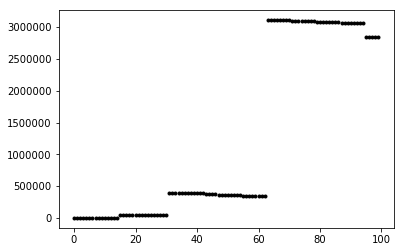

In [15]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis_div(100)[0])
pl.plot(x, y, 'k.')

<h2>Algoritmo de <i>Strassen</i></h2>

In [16]:
def s_suma(A,B):
    result=iniciar_matriz_vacia(len(A), len(A))
    for i in range(len(A)):
        for j in range(len(A)):
            result[i][j] = A[i][j]+ B[i][j]
    return result

def s_resta(A,B):
    result=iniciar_matriz_vacia(len(A), len(A))
    for i in range(len(A)):
        for j in range(len(A)):
            result[i][j] = A[i][j]- B[i][j]
    return result

def strassenR(A, B):
    n = len(A)
    if (n <= 2):
        row=len(A)
        col=len(B)
        result=iniciar_matriz_vacia(row, col)
        for i in range (row):
            for j in range (col):
                for k in range (col):
                    result[i][j]+= A[i][k]*B[k][j]
        return result
    else:
        new_size = n/2
        a11 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        a12 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        a21 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        a22 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        b11 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        b12 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        b21 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        b22 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        aResult = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]
        bResult = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]

        for i in xrange(0, new_size):
            for j in xrange(0, new_size):
                a11[i][j] = A[i][j]            
                a12[i][j] = A[i][j + new_size]    
                a21[i][j] = A[i + new_size][j]    
                a22[i][j] = A[i + new_size][j + new_size] 
                b11[i][j] = B[i][j]           
                b12[i][j] = B[i][j + new_size]    
                b21[i][j] = B[i + new_size][j]   
                b22[i][j] = B[i + new_size][j + new_size] 

        aResult = s_suma(a11, a22)
        bResult = s_suma(b11, b22)
        p1 = strassenR(aResult, bResult)

        aResult = s_suma(a21, a22)     
        p2 = strassenR(aResult, b11)  

        bResult = s_resta(b12, b22) 
        p3 = strassenR(a11, bResult)  

        bResult = s_resta(b21, b11) 
        p4 =strassenR(a22, bResult)   

        aResult = s_suma(a11, a12)     
        p5 = strassenR(aResult, b22) 

        aResult = s_resta(a21, a11) 
        bResult = s_suma(b11, b12)     
        p6 = strassenR(aResult, bResult) 

        aResult = s_resta(a12, a22)
        bResult = s_suma(b21, b22)     
        p7 = strassenR(aResult, bResult) 
       
        c12 = s_suma(p3, p5) 
        c21 = s_suma(p2, p4)  

        aResult = s_suma(p1, p4) 
        bResult = s_suma(aResult, p7) 
        c11 = s_resta(bResult, p5) 

        aResult = s_suma(p1, p3) 
        bResult = s_suma(aResult, p6) 
        c22 = s_resta(bResult, p2) 
        
        C = [[0 for j in xrange(0, n)] for i in xrange(0, n)]
        for i in xrange(0, new_size):
            for j in xrange(0, new_size):
                C[i][j] = c11[i][j]
                C[i][j + new_size] = c12[i][j]
                C[i + new_size][j] = c21[i][j]
                C[i + new_size][j + new_size] = c22[i][j]
        return C

def strassen(A, B):   
    nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2)))
    n = len(A)
    m = nextPowerOfTwo(n)
    APrep = [[0 for i in xrange(m)] for j in xrange(m)]
    BPrep = [[0 for i in xrange(m)] for j in xrange(m)]
    for i in xrange(n):
        for j in xrange(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = strassenR(APrep, BPrep)
    C = [[0 for i in xrange(n)] for j in xrange(n)]
    for i in xrange(n):
        for j in xrange(n):
            C[i][j] = CPrep[i][j]
    return C

In [17]:
A= iniciar_matriz_aleatoria(5,5,6)
B= iniciar_matriz_aleatoria(5,5,6)
print A
print B
print strassen(A,B)

[[3 1 5 4 1]
 [3 1 0 0 2]
 [3 4 3 5 1]
 [3 5 5 3 3]
 [4 3 2 1 3]]
[[3 1 2 0 2]
 [5 1 5 5 1]
 [0 2 2 3 3]
 [5 3 4 4 2]
 [0 4 3 1 2]]
[[34, 30, 40, 37, 32], [14, 12, 17, 7, 11], [54, 32, 55, 50, 31], [49, 39, 62, 55, 38], [32, 26, 40, 28, 25]]


<h4> Análisis del tiempo de ejecución</h4>

In [18]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_s_suma(A,B, acct):
    result=iniciar_matriz_vacia(len(A), len(A)); acct.count()  
    for i in range(len(A)):
        acct.count()  
        for j in range(len(A)):
            acct.count()  
            result[i][j] = A[i][j]+ B[i][j]; acct.count()  
    acct.count()  
    return result

def acct_s_resta(A,B, acct):
    result=iniciar_matriz_vacia(len(A), len(A)); acct.count()  
    for i in range(len(A)):
        acct.count()  
        for j in range(len(A)):
            acct.count()  
            result[i][j] = A[i][j]- B[i][j]; acct.count()  
    acct.count()  
    return result

def acct_strassenR(A, B, acct):
    n = len(A); acct.count()  
    if (n <= 2):
        acct.count()  
        row=len(A); acct.count()  
        col=len(B); acct.count()  
        result=iniciar_matriz_vacia(row, col); acct.count()  
        for i in range (row):
            acct.count()  
            for j in range (col):
                acct.count()  
                for k in range (col):
                    acct.count()  
                    result[i][j]+= A[i][k]*B[k][j]; acct.count()
        acct.count()  
        return result
    else:
        new_size = n/2; acct.count()  
        a11 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        a12 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        a21 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        a22 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        b11 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        b12 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        b21 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        b22 = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        aResult = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  
        bResult = [[0 for j in xrange(0, new_size)] for i in xrange(0, new_size)]; acct.count()  

        for i in xrange(0, new_size):
            acct.count()  
            for j in xrange(0, new_size):
                acct.count()  
                a11[i][j] = A[i][j]  ;   acct.count()         
                a12[i][j] = A[i][j + new_size] ;   acct.count()  
                a21[i][j] = A[i + new_size][j] ;   acct.count()  
                a22[i][j] = A[i + new_size][j + new_size] ; acct.count()  
                b11[i][j] = B[i][j]  ; acct.count()          
                b12[i][j] = B[i][j + new_size] ; acct.count()    
                b21[i][j] = B[i + new_size][j] ; acct.count()   
                b22[i][j] = B[i + new_size][j + new_size] ; acct.count()  

        aResult = acct_s_suma(a11, a22, acct); acct.count()  
        bResult = acct_s_suma(b11, b22, acct);  acct.count()  
        p1 = acct_strassenR(aResult, bResult, acct); acct.count()  

        aResult = acct_s_suma(a21, a22, acct) ; acct.count()  
        p2 = acct_strassenR(aResult, b11, acct)  ; acct.count()   

        bResult = acct_s_resta(b12, b22, acct) ; acct.count()  
        p3 = acct_strassenR(a11, bResult, acct)  ; acct.count()  

        bResult = acct_s_resta(b21, b11, acct) ; acct.count()  
        p4 =acct_strassenR(a22, bResult, acct)   ; acct.count()  

        aResult = acct_s_suma(a11, a12, acct)    ; acct.count()  
        p5 = acct_strassenR(aResult, b22, acct) ; acct.count()  

        aResult = acct_s_resta(a21, a11, acct) ; acct.count()  
        bResult = acct_s_suma(b11, b12, acct)   ; acct.count()  
        p6 = acct_strassenR(aResult, bResult, acct) ; acct.count()  

        aResult = acct_s_resta(a12, a22, acct) ; acct.count()  
        bResult = acct_s_suma(b21, b22, acct)  ; acct.count()     
        p7 = acct_strassenR(aResult, bResult, acct) ; acct.count()  
       
        c12 = acct_s_suma(p3, p5, acct) ; acct.count()  
        c21 = acct_s_suma(p2, p4, acct) ; acct.count()  

        aResult = acct_s_suma(p1, p4, acct) ; acct.count()  
        bResult = acct_s_suma(aResult, p7, acct) ; acct.count()  
        c11 = acct_s_resta(bResult, p5, acct) ; acct.count()  

        aResult = acct_s_suma(p1, p3, acct) ; acct.count()  
        bResult = acct_s_suma(aResult, p6, acct) ; acct.count()   
        c22 = acct_s_resta(bResult, p2, acct) ; acct.count()  
        
        C = [[0 for j in xrange(0, n)] for i in xrange(0, n)]; acct.count()  
        for i in xrange(0, new_size):
            acct.count()  
            for j in xrange(0, new_size):
                acct.count()  
                C[i][j] = c11[i][j]; acct.count()  
                C[i][j + new_size] = c12[i][j]; acct.count()  
                C[i + new_size][j] = c21[i][j]; acct.count()  
                C[i + new_size][j + new_size] = c22[i][j]; acct.count()  
        acct.count()  
        return C

def acct_strassen(A, B, acct):   
    nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2))); acct.count()  
    n = len(A); acct.count()  
    m = nextPowerOfTwo(n); acct.count()  
    APrep = [[0 for i in xrange(m)] for j in xrange(m)]; acct.count()  
    BPrep = [[0 for i in xrange(m)] for j in xrange(m)]; acct.count()  
    for i in xrange(n):
        acct.count()  
        for j in xrange(n):
            acct.count()  
            APrep[i][j] = A[i][j]; acct.count()  
            BPrep[i][j] = B[i][j]; acct.count()  
    CPrep = acct_strassenR(APrep, BPrep, acct); acct.count()  
    C = [[0 for i in xrange(n)] for j in xrange(n)]; acct.count()  
    for i in xrange(n):
        acct.count()  
        for j in xrange(n):
            acct.count()  
            C[i][j] = CPrep[i][j]; acct.count()  
    acct.count()  
    return C

In [19]:
A= iniciar_matriz_aleatoria(5,5,6)
B= iniciar_matriz_aleatoria(5,5,6)
acct = Counter()
acct_strassen(A, B, acct)
acct.print_steps()

Number of steps = 4675


<h4>Análisis experimental</h4><br>
A continuación se analizará el comportamiento del algoritmo cuando el tamaño de las matrices de entrada varía, desde 2 hasta 100, se graficarán los resultados de total de instrucciones Vs tamaño de la matriz.

In [20]:
import time

def exper_analysis_strassen(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        A= iniciar_matriz_aleatoria(i+2,i+2,6)
        B= iniciar_matriz_aleatoria(i+2,i+2,6)
        acct.reset()
        acct_strassen(A, B, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [21]:
print (exper_analysis_strassen(100))

[[60, 570, 607, 4675, 4732, 4799, 4876, 35590, 35687, 35794, 35911, 36038, 36175, 36322, 36479, 260795, 260972, 261159, 261356, 261563, 261780, 262007, 262244, 262491, 262748, 263015, 263292, 263579, 263876, 264183, 264500, 1872590, 1872927, 1873274, 1873631, 1873998, 1874375, 1874762, 1875159, 1875566, 1875983, 1876410, 1876847, 1877294, 1877751, 1878218, 1878695, 1879182, 1879679, 1880186, 1880703, 1881230, 1881767, 1882314, 1882871, 1883438, 1884015, 1884602, 1885199, 1885806, 1886423, 1887050, 1887687, 13296915, 13297572, 13298239, 13298916, 13299603, 13300300, 13301007, 13301724, 13302451, 13303188, 13303935, 13304692, 13305459, 13306236, 13307023, 13307820, 13308627, 13309444, 13310271, 13311108, 13311955, 13312812, 13313679, 13314556, 13315443, 13316340, 13317247, 13318164, 13319091, 13320028, 13320975, 13321932, 13322899, 13323876, 13324863, 13325860, 13326867], [0.00021764973308791014, 0.0014553250528024364, 0.0014408351953534293, 0.008505546294770738, 0.008622974514196358, 0.

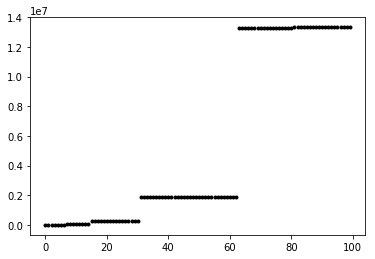

In [22]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis_strassen(100)[0])
pl.plot(x, y, 'k.')

<h2>Comparación de tiempos de ejecución</h2><br>
A continuación se mostrará una gráfica que compare los tiempos de ejecución de cada uno de los algoritmos, siendo <i>multiplicación de matrices</i> en negro, <i>divide and conquer</i> en rojo y <i>strassen</i> en azul

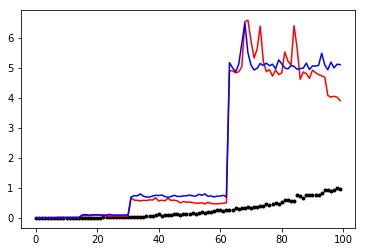

In [23]:
pl.clf()
resultadosa= []
resultadosb= []
resultadosc= []
x = np.arange(100)
resultadosa = np.array(exper_analysis_mult(100))
resultadosb = np.array(exper_analysis_div(100))
resultadosc = np.array(exper_analysis_strassen(100))
a = np.array(resultadosa[1])
b = np.array(resultadosb[1])
c = np.array(resultadosc[1])
pl.plot(x, a,'k.', b, 'r', c, 'b')